# Regression

## 1 Standard linear regression

In [1]:
import numpy as np

In [2]:
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1 # this is readline for reading one line
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines(): # this read all lines
        lineArr = []
        currentLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(currentLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(currentLine[-1]))
    return dataMat, labelMat

In [3]:
dataArr, labelArr = loadDataSet('ex0.txt')

In [4]:
def standRegress(xArr, yArr):
    datMat = np.mat(xArr)
    labelMat = np.mat(yArr).T # transpose the label mat to volumn vector
    xTx = datMat.T * datMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (datMat.T * labelMat)
    return ws

In [5]:
ws = standRegress(dataArr, labelArr)

In [6]:
xMat = np.mat(dataArr)
yMat = np.mat(labelArr).T
yHat_Actual = xMat * ws
#print(xMat)
xMat_Copy = xMat.copy() # sort the x to plot the line
xMat_Copy.sort(0)
#print(xMat_Copy)

yHat = xMat_Copy * ws
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111) # ax = plt.subplot(111)
ax.scatter(xMat[:, 1].flatten().A[0], yMat[:, 0].flatten().A[0])
ax.plot(xMat_Copy[:, 1], yHat, c = 'r')
plt.show()

<Figure size 640x480 with 1 Axes>

In [7]:
"""
correlation coefficient
"""
np.corrcoef(yHat_Actual.T, yMat.T)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

In [8]:
def lwlr(testPoint, xArr, yArr, k = 1.0):
    """
    add weight for the nearnest point
    """
    xMat = np.mat(xArr)
    m = np.shape(xMat)[0]
    yMat = np.mat(yArr).T
    weights = np.mat(np.eye(m))
    for j in range(m):
        diffMat = testPoint - xMat[j, :] # select every data set to get error difference
        weights[j, j] = np.exp(diffMat * diffMat.T / (-2.0 * k ** 2))
    xTx = xMat.T * (weights * xMat) # multiply the correspond feature
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

In [9]:
def lwlrTest(testArr, xArr, yArr, k = 1.0):
    m = np.shape(testArr)[0]
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

In [10]:
xMat = np.mat(dataArr)
srtInd = xMat[:, 1].argsort(0) # sort as the column and get index
xSort = xMat[srtInd][:, 0, :] # unknow
#xSort
yHat = lwlrTest(dataArr, dataArr, labelArr, 0.003)

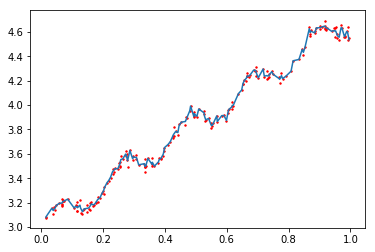

In [11]:
fig = plt.figure()
ax = plt.subplot(111)
yMat = np.mat(labelArr)
ax.scatter(xMat[:, 1].flatten().A[0], yMat.T.flatten().A[0], s = 2, c = 'r')
ax.plot(xSort[:, 1], yHat[srtInd])
plt.show()

## predict age of abalone

In [12]:
abX, abY = loadDataSet('abalone.txt')

In [13]:
abX

[[1.0, 0.455, 0.365, 0.095, 0.514, 0.2245, 0.101, 0.15],
 [1.0, 0.35, 0.265, 0.09, 0.2255, 0.0995, 0.0485, 0.07],
 [-1.0, 0.53, 0.42, 0.135, 0.677, 0.2565, 0.1415, 0.21],
 [1.0, 0.44, 0.365, 0.125, 0.516, 0.2155, 0.114, 0.155],
 [0.0, 0.33, 0.255, 0.08, 0.205, 0.0895, 0.0395, 0.055],
 [0.0, 0.425, 0.3, 0.095, 0.3515, 0.141, 0.0775, 0.12],
 [-1.0, 0.53, 0.415, 0.15, 0.7775, 0.237, 0.1415, 0.33],
 [-1.0, 0.545, 0.425, 0.125, 0.768, 0.294, 0.1495, 0.26],
 [1.0, 0.475, 0.37, 0.125, 0.5095, 0.2165, 0.1125, 0.165],
 [-1.0, 0.55, 0.44, 0.15, 0.8945, 0.3145, 0.151, 0.32],
 [-1.0, 0.525, 0.38, 0.14, 0.6065, 0.194, 0.1475, 0.21],
 [1.0, 0.43, 0.35, 0.11, 0.406, 0.1675, 0.081, 0.135],
 [1.0, 0.49, 0.38, 0.135, 0.5415, 0.2175, 0.095, 0.19],
 [-1.0, 0.535, 0.405, 0.145, 0.6845, 0.2725, 0.171, 0.205],
 [-1.0, 0.47, 0.355, 0.1, 0.4755, 0.1675, 0.0805, 0.185],
 [1.0, 0.5, 0.4, 0.13, 0.6645, 0.258, 0.133, 0.24],
 [0.0, 0.355, 0.28, 0.085, 0.2905, 0.095, 0.0395, 0.115],
 [-1.0, 0.44, 0.34, 0.1, 0.451, 0

In [14]:
yHat01 = lwlrTest(abX[0: 99], abX[0 : 99], abY[0 : 99], 0.1)
yHat1 = lwlrTest(abX[0: 99], abX[0 : 99], abY[0 : 99], 1)
yHat10 = lwlrTest(abX[0: 99], abX[0 : 99], abY[0 : 99], 10)

In [15]:
def rssError(yArr, yHatArr):
    return ((yHatArr - yArr)**2).sum()

In [16]:
rssError(abY[0: 99], yHat01.T)

56.825235689362394

In [17]:
rssError(abY[0: 99], yHat1.T)

429.8905618700943

In [18]:
rssError(abY[0: 99], yHat10.T)

549.1181708827294

In [19]:
yHat01 = lwlrTest(abX[100 : 199], abX[0 : 99], abY[0 : 99], 0.1)
rssError(abY[100: 199], yHat01.T)

35709.281008018035

In [20]:
yHat1 = lwlrTest(abX[100 : 199], abX[0 : 99], abY[0 : 99], 1)
rssError(abY[100: 199], yHat1.T)

573.5261441893857

In [21]:
yHat10 = lwlrTest(abX[100 : 199], abX[0 : 99], abY[0 : 99], 10)
rssError(abY[100: 199], yHat10.T)

517.5711905386906

In [22]:
ws = standRegress(abX[0:99], abY[0: 99])
yHat = np.mat(abX[100:199]) * ws
rssError(abY[100:199], yHat.T.A)

518.6363153250859

## 2.1  ridge regression

In [23]:
def ridgeRegress(xMat, yMat, lam = 0.2):
    xTx = xMat.T * xMat
    denom = xTx + np.eye(np.shape(xMat)[1]) * lam
    if np.linalg.det(denom) == 0.0:
        print("This matrix is singular, can not do inverse") # there is posibility that lam is 0
        return
    ws = denom.I * (xMat.T * yMat)
    return ws

In [35]:
def ridgeTest(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    yMean = np.mean(yMat, 0) # standard the sample
    yMat = yMat - yMean
    xMean = np.mean(xMat, 0)
    xVar = np.var(xMat, 0)
    xMat = (xMat - xMean) / xVar
    numTestPts = 30
    weight = np.zeros((numTestPts, np.shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegress(xMat, yMat, np.exp(i - 10))
        weight[i, :] = ws.T
    return weight

In [36]:
ridgeWeights = ridgeTest(abX, abY)

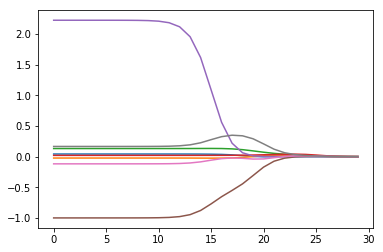

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show() # for eight line corresponde 8 feature every feature weight change from the original to zero

## 2.2 forward stepwise regression

In [40]:
def stagWise(xArr, yArr, eps = 0.01, numIt = 100):
    """
    eps: every learning step length
    numIt: iterate times
    """
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    # regular the data
    yMean = np.mean(yMat, 0)
    yMat = yMat - yMean
    xMean = np.mean(xMat, 0)
    xVar = np.var(xMat, 0)
    xMat = (xMean - xMat) / xVar
    m, n = np.shape(xMat)
    returnMat = np.zeros((numIt, n))
    ws = np.zeros((n, 1))
    wsTest = ws.copy()
    wsMax = ws.copy()
    for i in range(numIt):
        print(ws.T)
        lowestError = np.inf
        for j in range(n): # change one feature weight
            for sign in [-1, 1]: # add or subtract at the orignal weight
                wsTest = ws.copy()
                wsTest[j] += eps * sign  # if the error not less not change this feature
                yTest = xMat * wsTest
                rssE = rssError(yTest.A, yMat.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest 
        ws = wsMax.copy() # save the value of ws
        returnMat[i, :] = ws.T # save the i iterate result and use this result to expect next weight
    return returnMat

In [45]:
returnmat = stagWise(abX, abY, 0.01, 200)

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 0.    0.    0.   -0.01  0.    0.    0.    0.  ]]
[[ 0.    0.    0.   -0.02  0.    0.    0.    0.  ]]
[[ 0.    0.    0.   -0.03  0.    0.    0.    0.  ]]
[[ 0.    0.    0.   -0.04  0.    0.    0.    0.  ]]
[[ 0.    0.    0.   -0.05  0.    0.    0.    0.  ]]
[[ 0.    0.    0.   -0.06  0.    0.    0.    0.  ]]
[[ 0.    0.   -0.01 -0.06  0.    0.    0.    0.  ]]
[[ 0.    0.   -0.01 -0.06  0.    0.    0.   -0.01]]
[[ 0.    0.   -0.01 -0.06  0.    0.    0.   -0.02]]
[[ 0.    0.   -0.01 -0.06  0.    0.    0.   -0.03]]
[[ 0.    0.   -0.01 -0.06  0.    0.    0.   -0.04]]
[[ 0.    0.   -0.01 -0.06  0.    0.    0.   -0.05]]
[[ 0.    0.   -0.01 -0.06  0.    0.    0.   -0.06]]
[[ 0.    0.   -0.01 -0.06  0.    0.    0.   -0.07]]
[[ 0.    0.   -0.01 -0.06  0.    0.    0.   -0.08]]
[[ 0.    0.   -0.01 -0.05  0.    0.    0.   -0.08]]
[[ 0.    0.   -0.01 -0.05  0.    0.    0.   -0.09]]
[[ 0.    0.   -0.01 -0.05  0.    0.    0.   -0.1 ]]
[[ 0.    0.   -0.01 -0.05  0.    0. 

[[-0.04  0.   -0.09 -0.03 -0.31  0.64  0.   -0.36]]
[[-0.05  0.   -0.09 -0.03 -0.31  0.64  0.   -0.36]]
[[-0.04  0.   -0.09 -0.03 -0.31  0.64  0.   -0.36]]
[[-0.05  0.   -0.09 -0.03 -0.31  0.64  0.   -0.36]]
[[-0.04  0.   -0.09 -0.03 -0.31  0.64  0.   -0.36]]
[[-0.05  0.   -0.09 -0.03 -0.31  0.64  0.   -0.36]]
[[-0.04  0.   -0.09 -0.03 -0.31  0.64  0.   -0.36]]
[[-0.05  0.   -0.09 -0.03 -0.31  0.64  0.   -0.36]]
[[-0.04  0.   -0.09 -0.03 -0.31  0.64  0.   -0.36]]
[[-0.05  0.   -0.09 -0.03 -0.31  0.64  0.   -0.36]]
[[-0.04  0.   -0.09 -0.03 -0.31  0.64  0.   -0.36]]
[[-0.05  0.   -0.09 -0.03 -0.31  0.64  0.   -0.36]]
[[-0.04  0.   -0.09 -0.03 -0.31  0.64  0.   -0.36]]
[[-0.05  0.   -0.09 -0.03 -0.31  0.64  0.   -0.36]]
[[-0.04  0.   -0.09 -0.03 -0.31  0.64  0.   -0.36]]
[[-0.05  0.   -0.09 -0.03 -0.31  0.64  0.   -0.36]]
[[-0.04  0.   -0.09 -0.03 -0.31  0.64  0.   -0.36]]
[[-0.05  0.   -0.09 -0.03 -0.31  0.64  0.   -0.36]]
[[-0.04  0.   -0.09 -0.03 -0.31  0.64  0.   -0.36]]
[[-0.05  0. 

In [44]:
"""
use simple least squares
"""
xMat = np.mat(abX)
yMat = np.mat(abY).T
yMean = np.mean(yMat, 0) # standard the sample
yMat = yMat - yMean
xMean = np.mean(xMat, 0)
xVar = np.var(xMat, 0)
xMat = (xMat - xMean) / xVar
standRegress(xMat, yMat.T).T

matrix([[ 0.0430442 , -0.02274163,  0.13214087,  0.02075182,  2.22403814,
         -0.99895312, -0.11725427,  0.16622915]])

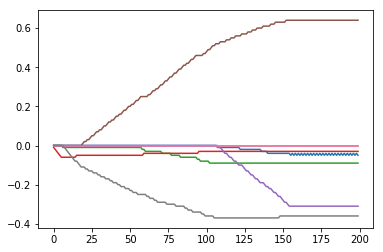

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(returnmat)
plt.show()

## 3 predict lego toys price

In [48]:
def crossValidation(xArr, yArr, numVal=10):
    m = len(yArr)
    indexList = list(range(m))
    errorMat = np.zeros((numVal, 30))
    for i in range(numVal):
        trainX = []
        trainY = []
        testX = []
        testY = []
        # shuffle() 方法将序列的所有元素随机排序。
        random.shuffle(indexList)
        for j in range(m):
            # 90%数据训练集
            if j < m * 0.9:
                trainX.append(xArr[indexList[j]]) # xArr[j]
                trainY.append(yArr[indexList[j]])
            # 10%数据测试集
            else:
                testX.append(xArr[indexList[j]])
                testY.append(yArr[indexList[j]])
        # 岭回归测试
        wMat = ridgeTest(trainX, trainY)
        for k in range(30):
            matTestX = np.mat(testX)
            matTrainX = np.mat(trainX)
            # 标准化
            meanTrain = np.mean(matTrainX, 0)
            varTrain = np.var(matTrainX, 0)
            matTestX = (matTestX - meanTrain) / varTrain
            # 数据还原
            yEst = matTestX * np.mat(wMat[k, :]).T + np.mean(trainY)
            errorMat[i, k] = rssError(yEst.T.A, np.array(testY))
    meanErrors = np.mean(errorMat, 0)
    minMean = float(min(meanErrors))
    bestWeights = wMat[np.nonzero(meanErrors == minMean)]
    # 表转换
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    meanX = np.mean(xMat, 0)
    varX = np.var(xMat, 0)
    unReg = bestWeights / varX
    print("%f%+f*年份%+f*部件数量%+f*是否为全新%+f*原价" % ((-1 * np.sum(np.multiply(meanX, unReg)) + np.mean(yMat)), unReg[0, 0], unReg[0, 1], unReg[0, 2], unReg[0, 3]))
    